# 2 分类

`ISLR`库的`smarket`(股旗市场)数据的数值和图像进行描述统计分析。该数据集奥包括从2001 年年初到2005年末1250天里S&P 500股票指数的投资回报率。数据中记录了过去5个交易日中的每个交易日的投资回报率，从`Lag1`到`Lag5`，同时也记录了`Volume`(前一日股票成交量，单位为十亿) ，`Today`(当日的投资回报率)以及`Direction`(这些数据在市场的走势方向，或Up (涨)或Down (跌))。

In [1]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.3.3"

In [2]:
str(Smarket)

'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


In [3]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [5]:
# cor()函数可以计算所有变量两两之间的相关系数矩阵，Direction变量是类别变量，需要排除
cor(Smarket[-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


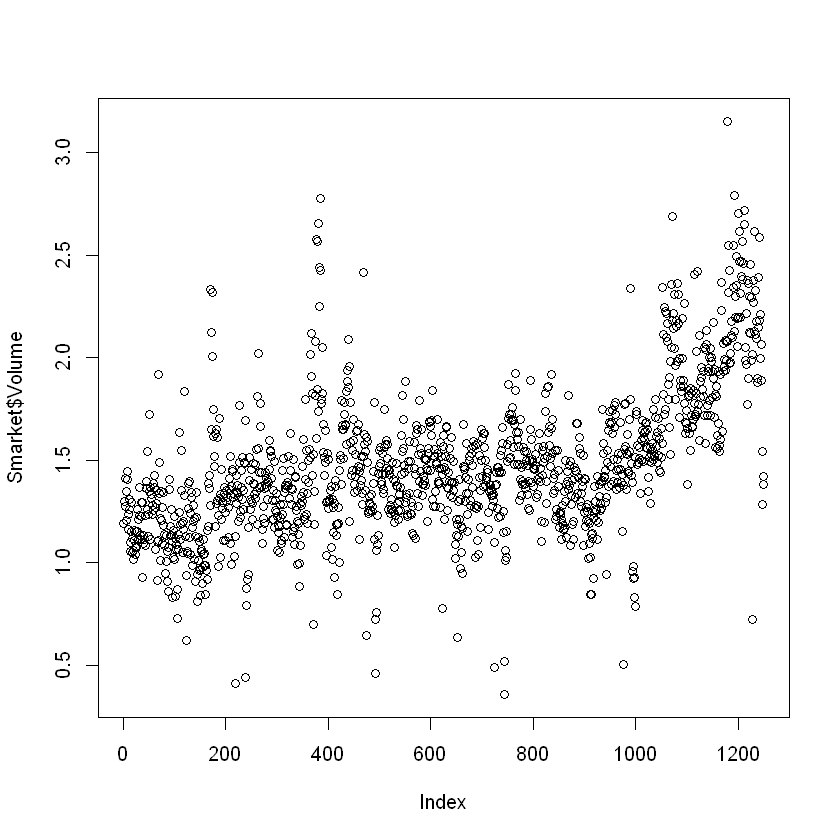

In [10]:
# Lag和Today之间的相关系数接近于零，当前投资回报率和先前的投资回报率之间相关性很小
# 唯一强相关的是Year和Volume，通过画图也可以观察到Volume随着时间一直增长
plot(Smarket$Volume)

## 2.1 逻辑斯蒂回归

`glm()`函数用于拟合广义线性模型(generalized linear model)，其中包含了逻辑斯蒂回归模型。`glm()`函数的用法与`lm()`类似，不同在于必须输入如下参数设置 `family=binomial`。该参数的功能是请求`R`执行逻辑斯蒂回归，不使用其他类型的广义线性模型。

In [11]:
glm.fit <- glm(Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [24]:
# 获取拟合模型的系数
coef(glm.fit)

summary(glm.fit)$coef[,4]

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

In [22]:
# 参数type='response'告诉R输出概率P(Y=1|X)
glm.probs <- predict(glm.fit, type='response')
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [23]:
# 返回虚拟变量Direction的编码
contrasts(Smarket$Direction)

,Up
Down,0
Up,1


In [25]:
# 预测特定某一天市场上涨还是下跌，将预测的概率转化为类别
glm.pred=rep("Down",1250)
glm.pred[glm.probs>.5]="Up"

In [27]:
# table()函数产生混淆矩阵来判断有多少观测被正确或错误分类了
table(glm.pred, Smarket$Direction)

        
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [31]:
# 训练集上的预测正确率
(507+145)/1250
mean(glm.pred==Smarket$Direction)

[1] 0.5216

[1] 0.5216

In [34]:
# 用2001年到2004年的数据作为训练集，2005年的数据作为测试集
train <- (Smarket$Year<2005)
Smarket.2005 <- Smarket[!train, ]
dim(Smarket[train, ])
dim(Smarket.2005)

[1] 998   9

[1] 252   9

In [35]:
glm.fit=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fit,Smarket.2005,type="response")

In [36]:
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"

In [39]:
# 测试集上的混淆矩阵
table(glm.pred, Smarket$Direction[!train])

        
glm.pred Down Up
    Down   77 97
    Up     34 44

In [40]:
# 测试集上的预测正确率
mean(glm.pred==Smarket$Direction[!train])

[1] 0.4801587

In [41]:
# 选取两个p值最低的预测变量，重新构建模型
glm.fit=glm(Direction~Lag1+Lag2,data=Smarket,family=binomial,subset=train)
glm.probs=predict(glm.fit,Smarket.2005,type="response")

In [42]:
glm.pred=rep("Down",252)
glm.pred[glm.probs>.5]="Up"

In [43]:
# 混淆矩阵
table(glm.pred, Smarket$Direction[!train])

        
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [44]:
# 预测正确率
mean(glm.pred==Smarket$Direction[!train])

[1] 0.5595238

In [45]:
# 在特定的Lag1和Lag2值下预测投资回报率
predict(glm.fit,newdata=data.frame(Lag1=c(1.2,1.5),Lag2=c(1.1,-0.8)),type="response")

1         2 
0.4791462 0.4960939